In [1]:
import numpy as np
import nengo
from nengo.utils.ensemble import tuning_curves
import matplotlib
import matplotlib.pyplot as plt

In [156]:
def get_neuron_tuning_curves(n_neurons=10):
    with nengo.Network(seed=581) as model:
        ens = nengo.Ensemble(
            n_neurons=n_neurons, dimensions=1,
            max_rates=nengo.dists.Uniform(50, 100))

    with nengo.Simulator(model, progress_bar=None) as sim:
        X, A = tuning_curves(ens, sim)
    return X.T, A.T

def compute_decoder(A, Y, sigma=0.1):
    n, N = A.shape
    d, _ = Y.shape
    return np.linalg.lstsq(
        (A @ A.T + N * np.square(sigma * np.max(A)) * np.eye(n)),
        A @ Y.T,
        rcond=None
    )[0].T

In [170]:
def plot_function_decoding(ax, A, X, Y, title=""):
    D = compute_decoder(A, Y)
    ax.plot(X.T, Y.T, 'k--')
    ax.plot(X.T, (D @ A).T)
    ax.set_xlabel('Represented value $x$')
    ax.set_ylabel('Decoded value $f(x)$')

    rmse = np.sqrt(np.mean(np.square(D @ A - Y)))
    ax.set_title(title)
    ax.text(0.15, 0.95, "$E = {:.2f}$".format(rmse),
        horizontalalignment='left',
        verticalalignment='top',
        fontsize=7,
        transform=ax.transAxes)

In [176]:
def plot_experiment(n_neurons):
    X, A = get_neuron_tuning_curves(n_neurons)

    fig, axs = plt.subplots(2, 3, figsize=(6.5, 3.5))

    axs[0, 0].plot(X.T, A.T)
    axs[0, 0].set_ylim(0, 100)
    axs[0, 0].set_xlabel('Represented value $x$')
    axs[0, 0].set_ylabel('Activity $a_i$ ($\\mathrm{s}^{-1}$)')
    axs[0, 0].set_title('Tuning curves ($n={}$)'.format(A.shape[0]))

    plot_function_decoding(
        axs[0, 1], A, X, Y=X,
        title='$f(x) = x$')

    plot_function_decoding(
        axs[0, 2], A, X, Y=np.square(X),
        title='$f(x) = x^2$')

    plot_function_decoding(
        axs[1, 0], A, X, Y=np.sin(np.pi * X),
        title='$f(x) = \\sin(\\pi x)$')

    plot_function_decoding(
        axs[1, 1], A, X, Y=np.abs(X),
        title='$f(x) = |x|$')

    plot_function_decoding(
        axs[1, 2], A, X, Y=np.sign(X),
        title='$f(x) = \\sigma(x)$')

    fig.tight_layout(h_pad=-0.25)
    return fig

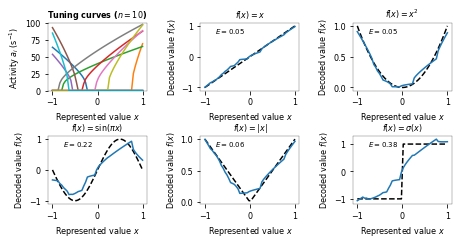

In [177]:
fig = plot_experiment(10)
fig.savefig("../function_decodings_10.pdf", transparent=True, bbox_inches='tight')

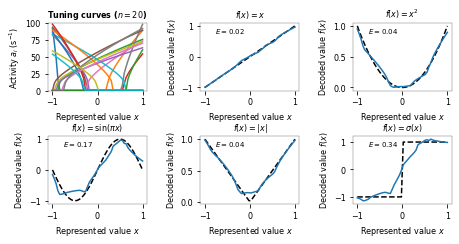

In [178]:
fig = plot_experiment(20)
fig.savefig("../function_decodings_20.pdf", transparent=True, bbox_inches='tight')

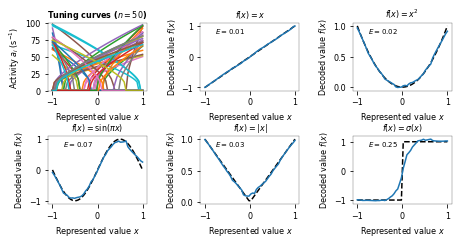

In [179]:
fig = plot_experiment(50)
fig.savefig("../function_decodings_50.pdf", transparent=True, bbox_inches='tight')

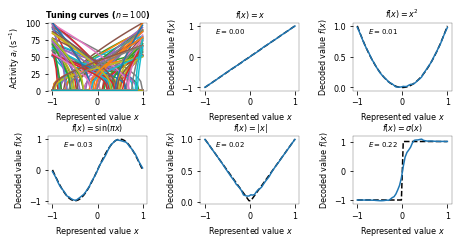

In [180]:
fig = plot_experiment(100)
fig.savefig("../function_decodings_100.pdf", transparent=True, bbox_inches='tight')